<center><u><H1>Principal Component Analysis(PCA)</H1></u></center>

In [1]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

## Load the data

In [2]:
iris = load_iris()
X=iris.data
y=iris.target

## Preprocessing the data

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=2019)

In [4]:
sc = StandardScaler()
X_std = sc.fit_transform(X)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

## Defining models

In [5]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA

In [6]:
pca = PCA(n_components=2)
svm = SVC(kernel='rbf', gamma=0.2)

### PCA ratio:

In [7]:
pca.fit(X_std)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [8]:
print(f"Explained Variance Ratio: {pca.explained_variance_ratio_}")

Explained Variance Ratio: [0.72962445 0.22850762]


In [9]:
print(f"{pca.explained_variance_ratio_.sum()}")

0.9581320720000164


### Transforming data:

In [10]:
X_train_pca = pca.transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

In [11]:
svm.fit(X_train_pca, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.2, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

## Metrics:

In [12]:
svm_pred = svm.predict(X_test_pca)
print(f"Accuracy Score:{accuracy_score(y_test,svm_pred)}")

Accuracy Score:0.9333333333333333


In [13]:
print(f"Confusion Matrix:\n{confusion_matrix(y_test,svm_pred)}")

Confusion Matrix:
[[19  0  0]
 [ 0  7  3]
 [ 0  0 16]]


In [14]:
print(f"Classification Report:\n{classification_report(y_test,svm_pred)}")

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.70      0.82        10
           2       0.84      1.00      0.91        16

    accuracy                           0.93        45
   macro avg       0.95      0.90      0.91        45
weighted avg       0.94      0.93      0.93        45



## Plotting Decision Regions:

In [15]:
import Plotting_Decision_Boundaries as pdb

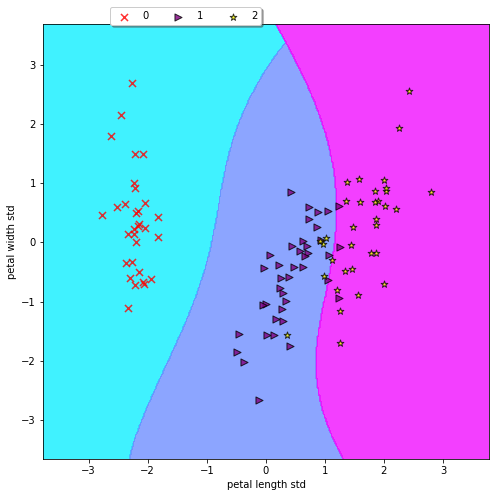

In [16]:
pdb.plotting_db(X=X_train_pca,y=y_train,classifier=svm)

### Evaluating the test set:

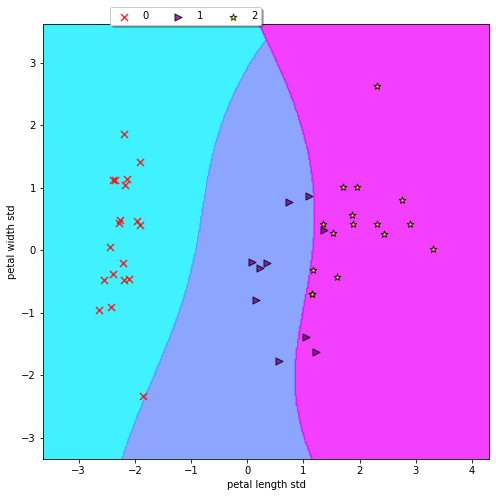

In [17]:
pdb.plotting_db(X=X_test_pca,y=y_test,classifier=svm)

## Reference: 
http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html